In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime  import datetime
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor,ExtraTreesRegressor,RandomForestRegressor,GradientBoostingRegressor
from sklearn.model_selection import KFold,cross_val_score
import warnings
warnings.filterwarnings('ignore')
sns.set_style('white')
%matplotlib inline

### Importing the training data and merging trainlabel data.

In [2]:
train_data = pd.read_csv(r'Dataset/train.csv',parse_dates=['datetime'])
train_data['Total_Booking'] = pd.read_csv(r'Dataset/train_label.csv',header = None)

### Importing the testing data and merging testlabel data. 

In [3]:
test_data = pd.read_csv(r'Dataset/test.csv',parse_dates=['datetime'])
test_data['Total_Booking'] = pd.read_csv(r'Dataset/test_label.csv',header = None)

In [4]:
train_data.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [5]:
test_data.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking
0,2012-05-10 11:00:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256
1,2012-06-09 07:00:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87
2,2011-03-06 20:00:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11
3,2011-10-13 11:00:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84
4,2012-06-02 12:00:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668


### Extracting information from the datetime attribute

In [6]:
data_list = [train_data,test_data]
for i in data_list:
    i['Date'] = i['datetime'].apply(lambda x : x.date())
    i['Hour'] = i['datetime'].apply(lambda x : x.hour)
    i['Day'] =  i['datetime'].apply(lambda x : x.date().strftime('%A'))
    i['Month'] = i['datetime'].apply(lambda x : x.date().strftime('%B'))
    i['Year'] = i['datetime'].apply(lambda x : x.year)
    i['Day_No'] = i['datetime'].apply(lambda x : x.weekday())
    i['Month_No'] = i['datetime'].apply(lambda x : x.month)
    i.drop('datetime',axis = 1 , inplace = True)

In [7]:
train_data.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking,Date,Hour,Day,Month,Year,Day_No,Month_No
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012-05-02,19,Wednesday,May,2012,2,5
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012-09-05,4,Wednesday,September,2012,2,9
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011-01-13,9,Thursday,January,2011,3,1
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011-11-18,16,Friday,November,2011,4,11
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011-09-13,13,Tuesday,September,2011,1,9


In [8]:
test_data.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking,Date,Hour,Day,Month,Year,Day_No,Month_No
0,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256,2012-05-10,11,Thursday,May,2012,3,5
1,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87,2012-06-09,7,Saturday,June,2012,5,6
2,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11,2011-03-06,20,Sunday,March,2011,6,3
3,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84,2011-10-13,11,Thursday,October,2011,3,10
4,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668,2012-06-02,12,Saturday,June,2012,5,6


In [9]:
train_data.dtypes

season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
Total_Booking      int64
Date              object
Hour               int64
Day               object
Month             object
Year               int64
Day_No             int64
Month_No           int64
dtype: object

In [10]:
#Converting the 'Date' attribute to datetime format.
#Converting the 'Day' attribute to string format.
for i in data_list:
    i['Date'] = pd.to_datetime(i['Date'],errors = 'coerce')
    i['Day'] = i['Day'].astype('str') 

In [11]:
train_data.dtypes

season                   object
holiday                   int64
workingday                int64
weather                  object
temp                    float64
atemp                   float64
humidity                  int64
windspeed               float64
Total_Booking             int64
Date             datetime64[ns]
Hour                      int64
Day                      object
Month                    object
Year                      int64
Day_No                    int64
Month_No                  int64
dtype: object

# TASK - 1
## I .Visualize data using different visualizations to generate interesting insights.

#### Analysing and visualization of each attribute in the Training_data.

#### SEASON

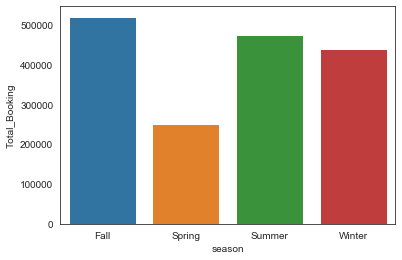

In [12]:
seasonal_bookings = pd.DataFrame(train_data.groupby('season')['Total_Booking'].sum().reset_index())
%matplotlib inline
ax = sns.barplot(x='season',y='Total_Booking' ,data=seasonal_bookings,)
plt.show()

##### From the above plot we can see that fall have the most number of cab bookings whereas spring has the comparitively low bookings due to the pleasant enviornment.Winters and Summers too have comparitively large bookings.

####  HOLIDAY
##### From my prespective the holiday column tells us if a day was holiday other than the normal weekends i.e. days like Diwali is flag 1 else 0.

   holiday
0     8460
1      248


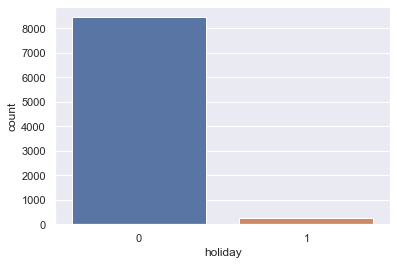

In [13]:
print(pd.DataFrame(train_data['holiday'].value_counts()))
%matplotlib inline
sns.set(style="darkgrid")
ax = sns.countplot(x='holiday',  data=train_data)
plt.show()

#### WORKING DAY
##### The workingday column tells us if the day was a weekday or a weekend and if it was working for the company. 1 shows working day and 0 shows not working day

   workingday
1        5924
0        2784


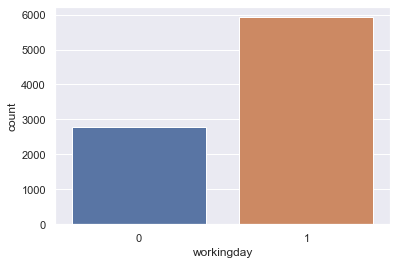

In [14]:
print(pd.DataFrame(train_data['workingday'].value_counts()))
%matplotlib inline
sns.set(style="darkgrid")
ax = sns.countplot(x='workingday',  data=train_data)
plt.show()

#### WEATHER
##### The weather column tells us about the weather.

In [15]:
print(train_data['weather'].unique())
print('\n There are 4 values in the weather column as shown above')

[' Clear + Few clouds' ' Light Snow, Light Rain' ' Mist + Cloudy '
 ' Heavy Rain + Thunderstorm ']

 There are 4 values in the weather column as shown above


                             weather
 Clear + Few clouds             5753
 Mist + Cloudy                  2276
 Light Snow, Light Rain          678
 Heavy Rain + Thunderstorm         1


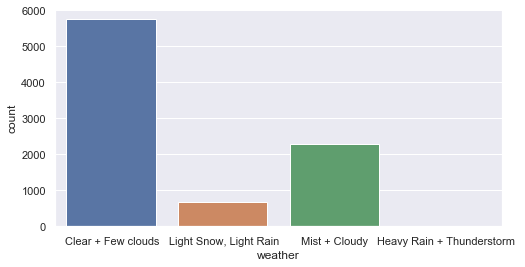

In [16]:
print(pd.DataFrame(train_data['weather'].value_counts()))
%matplotlib inline
plt.figure(figsize = (8,4))
sns.set(style="darkgrid")
ax = sns.countplot(x='weather',  data=train_data)
plt.show()

##### Since the seasons are Summer, Fall , Spring and Winter it is not a surprising fact that there was no heavy rain. However light showers are not scarce.

#### TEMPERATURE , HUMIDITY AND WINDSPEED


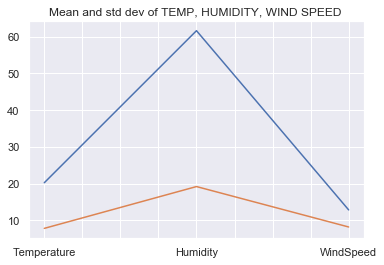

,Temperature,Humidity,WindSpeed
count,8708.000000,8708.000000,8708.000000
mean,20.243020,61.649173,12.843891
std,7.813494,19.199578,8.190314
min,0.820000,0.000000,0.000000
25%,13.940000,46.000000,7.001500
50%,20.500000,61.000000,12.998000
75%,26.240000,77.000000,16.997900
max,41.000000,100.000000,56.996900


In [17]:
temp_hum_wind= pd.DataFrame(train_data['temp'].describe())
temp_hum_wind['Humidity'] = train_data['humidity'].describe()
temp_hum_wind['WindSpeed'] = train_data['windspeed'].describe()
temp_hum_wind.columns = ['Temperature' , 'Humidity' , 'WindSpeed']
plt.title('Mean and std dev of TEMP, HUMIDITY, WIND SPEED ')
temp_hum_wind.loc['mean'].plot()
temp_hum_wind.loc['std'].plot()
plt.show()
temp_hum_wind

####  Which hour of day has the most temperature , humidity and windspeed

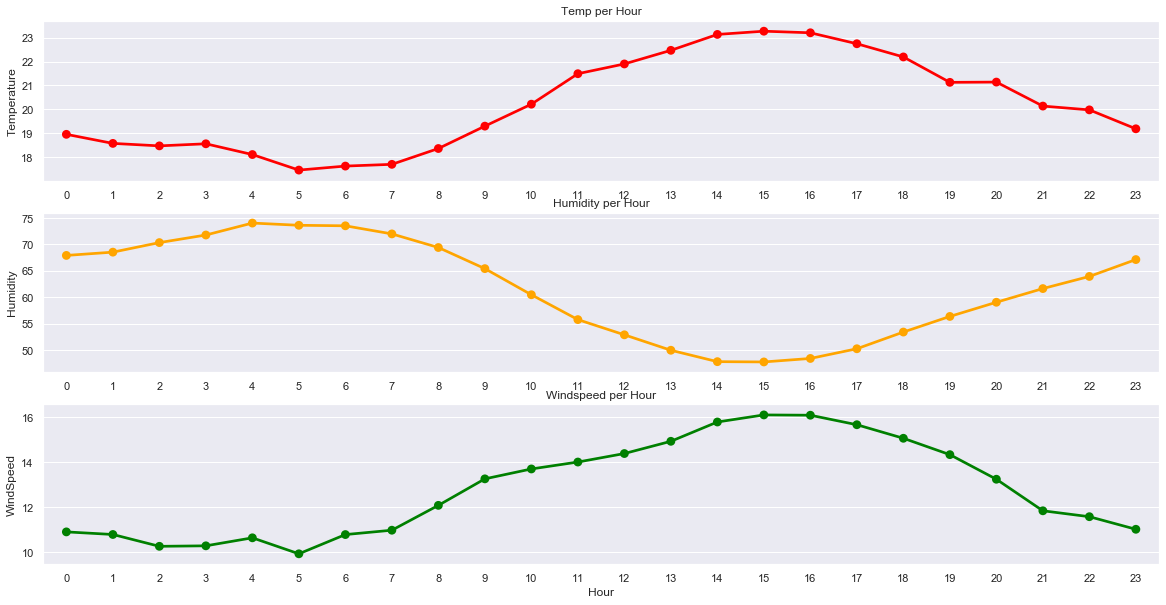

In [18]:
fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(20,10)
hr_t_h_w = pd.DataFrame(train_data.groupby('Hour')['temp'].mean().reset_index())
hr_t_h_w['humidity']  = pd.DataFrame(train_data.groupby('Hour')['humidity'].mean().reset_index())['humidity']
hr_t_h_w['windspeed'] = pd.DataFrame(train_data.groupby('Hour')['windspeed'].mean().reset_index())['windspeed']
sns.pointplot(data=hr_t_h_w,x="Hour",y="temp",ax=ax1 , color = 'red')
ax1.set(xlabel='', ylabel='Temperature',title="Temp per Hour")

sns.pointplot(data=hr_t_h_w,x="Hour",y="humidity",ax=ax2,color = 'orange')
ax2.set(xlabel='', ylabel='Humidity',title="Humidity per Hour")

sns.pointplot(data=hr_t_h_w,x="Hour",y="windspeed",ax=ax3,color = 'green')
ax3.set(xlabel='Hour', ylabel='WindSpeed',title="Windspeed per Hour")

plt.show()

##### Lowest Temp is at 5 am and highest around 4 pm
##### Lowest Humidity is around 3 to 4 pm and highest at 4 am
##### Lowest Windspeed around 5 am and highest around 4 to 5 pm

####  Which season has the most temperature , humidity and windspeed

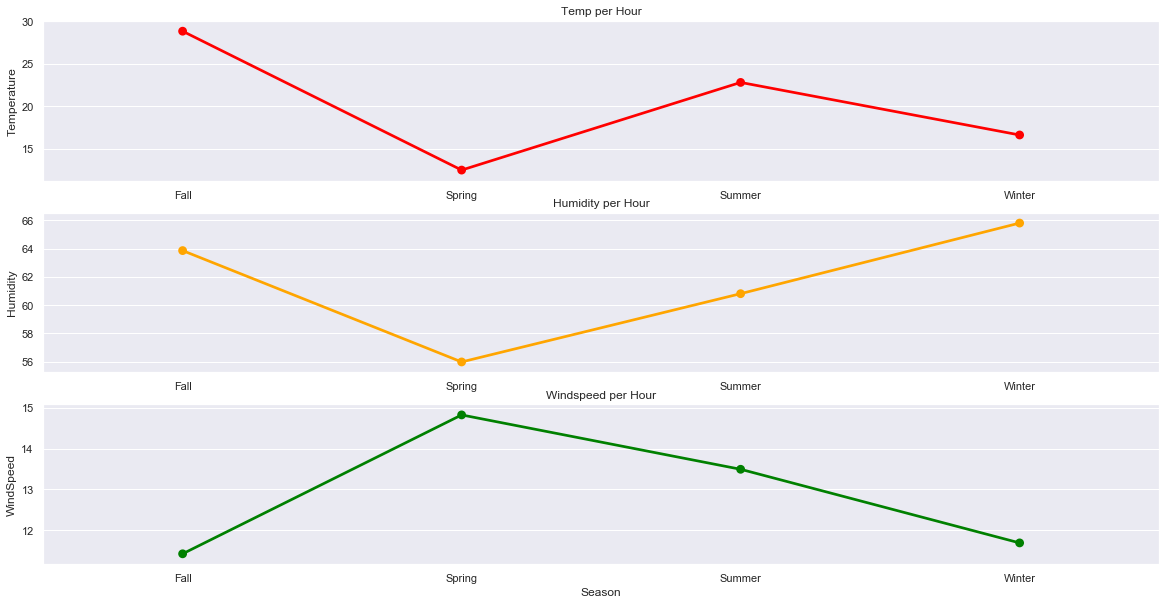

In [19]:
fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(20,10)
sea_t_h_w = pd.DataFrame(train_data.groupby('season')['temp'].mean().reset_index())
sea_t_h_w['humidity']  = pd.DataFrame(train_data.groupby('season')['humidity'].mean().reset_index())['humidity']
sea_t_h_w['windspeed'] = pd.DataFrame(train_data.groupby('season')['windspeed'].mean().reset_index())['windspeed']
sns.pointplot(data=sea_t_h_w,x="season",y="temp",ax=ax1 , color = 'red')
ax1.set(xlabel='', ylabel='Temperature',title="Temp per Hour")

sns.pointplot(data=sea_t_h_w,x="season",y="humidity",ax=ax2,color = 'orange')
ax2.set(xlabel='', ylabel='Humidity',title="Humidity per Hour")

sns.pointplot(data=sea_t_h_w,x="season",y="windspeed",ax=ax3,color = 'green')
ax3.set(xlabel='Season', ylabel='WindSpeed',title="Windspeed per Hour")

plt.show()

##### Fall has the highest temperature and Spring has the lowest.
##### Winter has the highest humidity and Spring has the lowest.
##### Fall has the lowest windspeed and spring has the highest.

## II .Outlier Analysis

#### Using box plots to visualize outliers

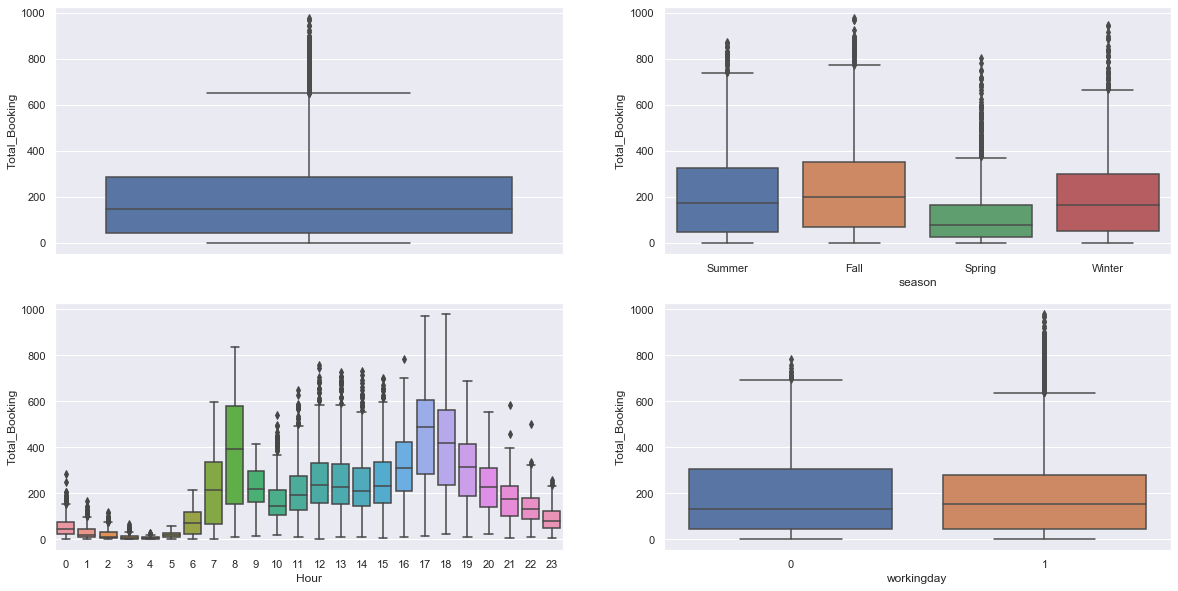

In [20]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20, 10)
sns.boxplot(data=train_data,y="Total_Booking",ax=axes[0][0])
sns.boxplot(data=train_data,y="Total_Booking",x="season",ax=axes[0][1])
sns.boxplot(data=train_data,y="Total_Booking",x="Hour",ax=axes[1][0])
sns.boxplot(data=train_data,y="Total_Booking",x="workingday",ax=axes[1][1])
plt.show()

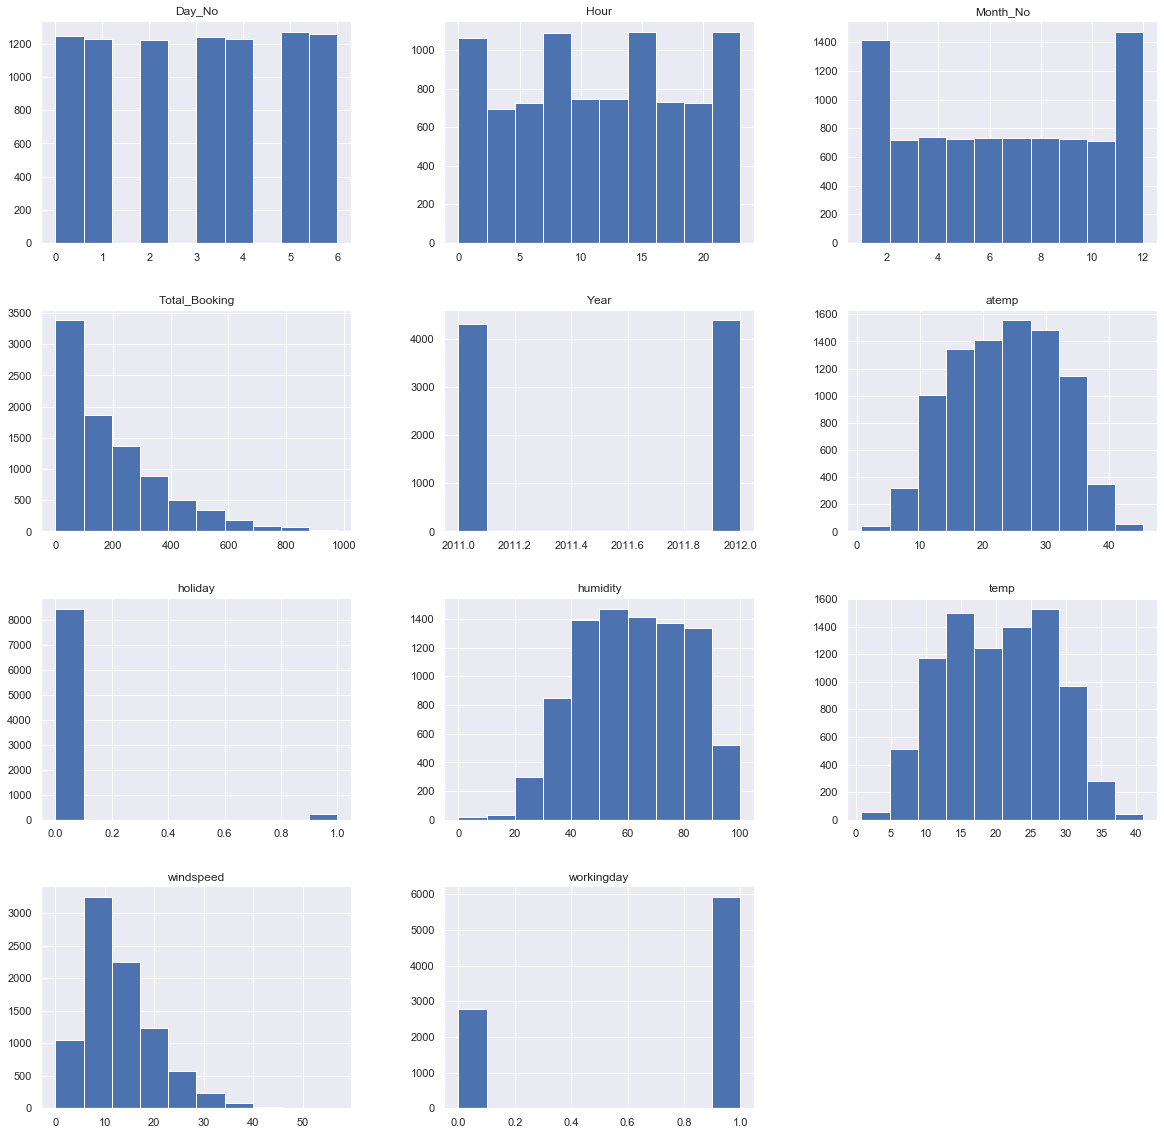

In [21]:
train_data.hist(figsize=(20,20))
plt.show()

##### When we look at the Total_Bookings we could see a spike in the 0 bookings but on closer view as shown below there are absolutely no 0 bookings and hence not an outlier in my perspective.

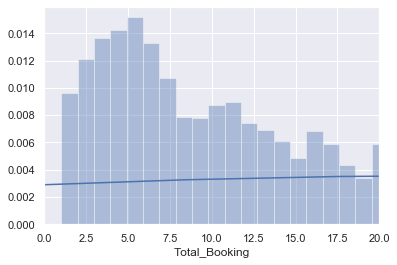

In [22]:
g = sns.distplot(train_data['Total_Booking'],bins =1000 )
g.set(xlim=(0,20))
plt.show()

In [23]:
print(train_data.eq(0).sum()) # Finding the number of '0'values in each column

season              0
holiday          8460
workingday       2784
weather             0
temp                0
atemp               0
humidity           18
windspeed        1056
Total_Booking       0
Date                0
Hour              350
Day                 0
Month               0
Year                0
Day_No           1247
Month_No            0
dtype: int64


##### An outlier that i think is the Heavy Rain + Thunderstorm because there is only one row in the whole dataset that tells us about that weather and that is not enough to predict. So we could remove that row

In [24]:
print(pd.DataFrame(train_data['weather'].value_counts()))

                             weather
 Clear + Few clouds             5753
 Mist + Cloudy                  2276
 Light Snow, Light Rain          678
 Heavy Rain + Thunderstorm         1


In [25]:
train_data.drop(train_data[train_data.weather == ' Heavy Rain + Thunderstorm '].index , inplace=True)

In [26]:
train_data.shape#lets keep a record of the data

(8707, 16)

In [27]:
for col in ['atemp','temp','humidity','windspeed','Total_Booking']:
    percentiles = train_data[col].quantile([0.01,0.99]).values #Filtering 1%(0-1), 1%(99-100) extreme outlier data
    train_data[col] = np.clip(train_data[col], percentiles[0], percentiles[1])

In [28]:
train_data.shape#lets now look at the shape

(8707, 16)

## III . Missing Value Analysis

In [29]:
train_data.isna().sum()

season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_Booking    0
Date             0
Hour             0
Day              0
Month            0
Year             0
Day_No           0
Month_No         0
dtype: int64

In [30]:
test_data.isna().sum()

season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_Booking    0
Date             0
Hour             0
Day              0
Month            0
Year             0
Day_No           0
Month_No         0
dtype: int64

##### Absolutely no missing data.

## IV .Visualizing Total_booking Vs other features to generate insights

#### Comparison analysis of multiple attributes (Multivariate Analysis) Total_Booking vs other variables.

#### 1. Plotting Year Wise Bookings

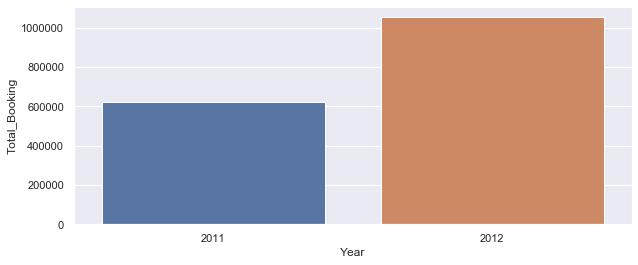

In [31]:
plt.figure(figsize = (10,4))
plot_year = pd.DataFrame(train_data.groupby('Year')['Total_Booking'].sum())
sns.barplot(data = plot_year , x =plot_year.index , y = 'Total_Booking' )
plt.show()

##### Each year the cab booking rates are increasing as more and more people become aware of it benefits and the cab companies might have introduced offers to bring in more customers.

#### 2. Plotting the total bookings versus month

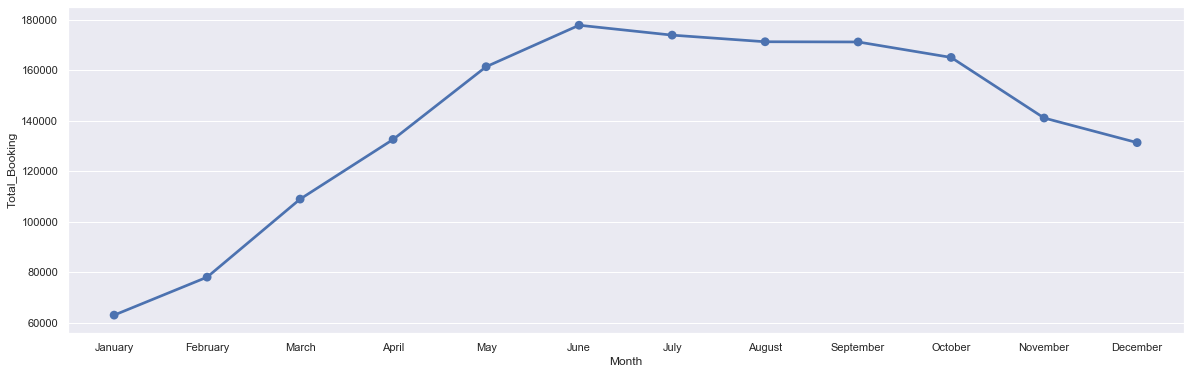

In [32]:
plt.figure(figsize = (20,6))
index_order = ["January","February","March","April","May","June","July","August","September","October","November","December"]
plot_month = pd.DataFrame(train_data.groupby(by = 'Month')['Total_Booking'].sum()).reindex(index_order)
sns.pointplot(data = plot_month , x =plot_month.index , y = 'Total_Booking' )
plt.show()

##### January to February have comparitively low amount of bookings as they have pleasent temperature.
##### March to May has the highest recorded temperatures due to which more people book cabs.
##### June to September has Monsoon or rainy seasons in which June has the highest rainfall which gradually reduces to September.
##### October to December usually has a cold atmosphere due to which bookings remain lower than earlier months but higher than Jan to Feb

#### 3.Plotting the bookings per hour in each day

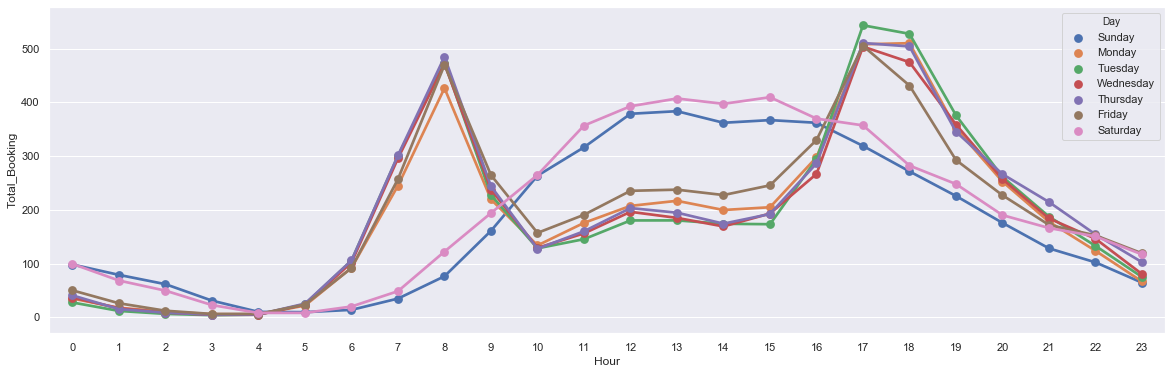

In [33]:
plt.figure(figsize = (20,6))
index_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
day_hr = pd.DataFrame(train_data.groupby(['Day','Hour'])['Total_Booking'].mean().reset_index().reindex())
sns.pointplot(data= day_hr, x = 'Hour' ,y = 'Total_Booking', hue = 'Day',kind = 'line',hue_order=index_order)
plt.show()

##### The most bookings are between 8 am and 5 pm the peak points being 8am which might be the regular commutes to office and 5 pm which might be the commutes from office.(Working days)
##### The weekends since having no office people might wake late and hangout so bookings peak at the mid of the day

#### 4. Plotting the bookings per weather in each season 

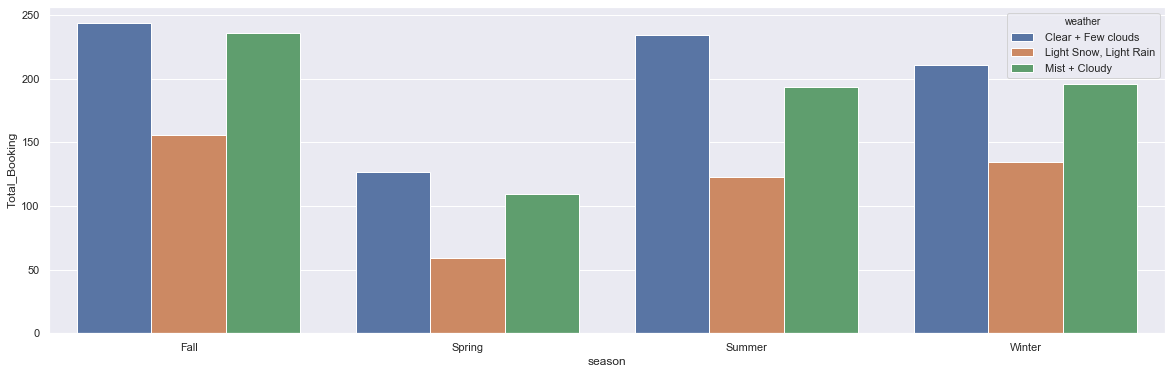

In [34]:
plt.figure(figsize = (20,6))
seas_hr = pd.DataFrame(train_data.groupby(['season','weather'])['Total_Booking'].mean().reset_index())
sns.barplot(data= seas_hr, x = 'season' ,y = 'Total_Booking', hue = 'weather')
plt.show()

##### Weather is a day to day perspective while season is a monthy perspective.
##### As we can see during the 4 season three kinds of weathers were experienced by the people, mainly 'clear + few clouds' , 'light snow + light rain' , 'mist + cloudy' and mostly bookings were high in 'clear + few clouds' and 'mist + cloudy' time. But we can see that 'light snow + light rain' has comparitively dewer bookings in all seasons which maybe because they were totally unexpected and people may not have ventured to book cabs and rather stayed at home or office during this time.

##### Now to explain why there was low bookings on 'light snow + light rain' might be because the weather is stretched through the entire span of the day and so people might have used their own cars  or pooled them and used the same means to get back home. So overall bookings are low(or might have just stayed at home as they saw it was  raining).

In [35]:
weather_hr = pd.DataFrame(train_data.groupby(['weather','Hour'])['Total_Booking'].mean().reset_index())

[]

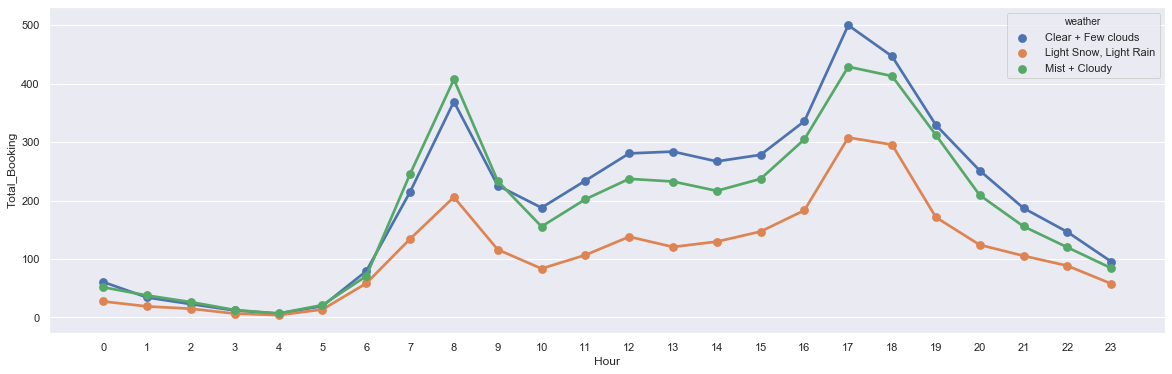

In [36]:
plt.figure(figsize = (20,6))
sns.pointplot(data = weather_hr , x= 'Hour' , y = 'Total_Booking' , hue = 'weather')
plt.plot()

#### Visualizing bookings according to temperature humidity and windspeed.

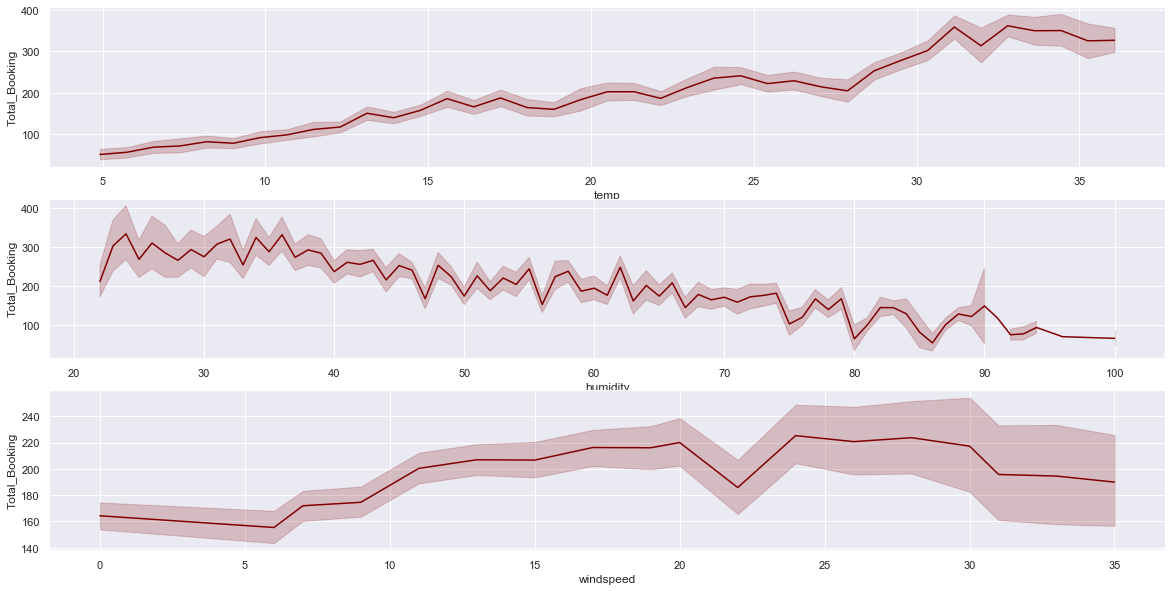

In [37]:
fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(20,10)
sns.lineplot(x = train_data['temp'],y = train_data['Total_Booking'] , ax = ax1,color = 'maroon')
sns.lineplot(x = train_data['humidity'],y = train_data['Total_Booking'] , ax = ax2,color = 'maroon')
sns.lineplot(x = train_data['windspeed'],y = train_data['Total_Booking'] , ax = ax3,color = 'maroon')
plt.show()

#### Visualizing working day column with the Total_booking.

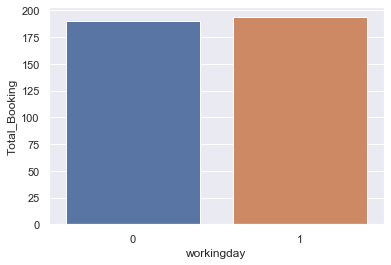

,workingday
1,5923
0,2784


In [38]:
wrk_day = pd.DataFrame(train_data.groupby(['workingday'])['Total_Booking'].mean()).reset_index()
sns.barplot(data = wrk_day , x = 'workingday' , y = 'Total_Booking')
plt.show()
pd.DataFrame(train_data['workingday'].value_counts())

##### We can see that the total no of bookings in weekends is almost the same that as in weekdays combined. It means that people tend to book more cabs in weekends even though the total no of weekends is less than half the number of weekdays.

## V . Correlation Analysis

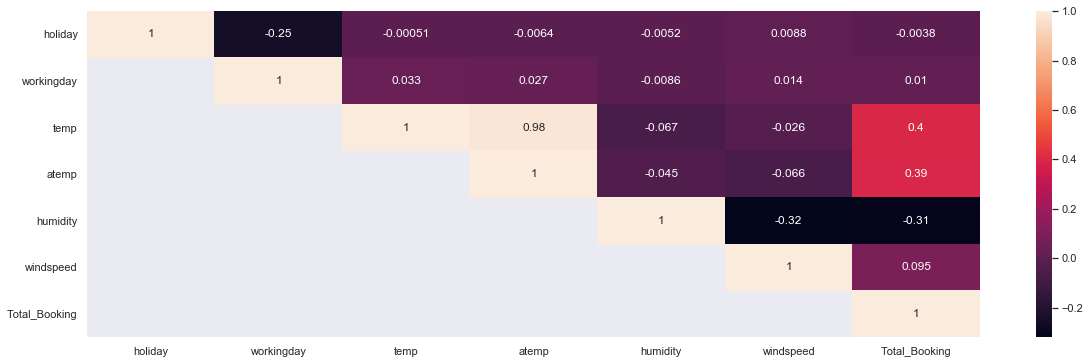

In [39]:
plt.figure(figsize = (20,6))
corrMatt = train_data[['holiday', 'workingday', 'temp', 'atemp','humidity', 'windspeed', 'Total_Booking']].corr()
mask = np.array(corrMatt)
mask[np.triu_indices_from(mask)] = False
sns.heatmap(corrMatt,mask = mask ,annot=True,annot_kws={'size':12})
plt.show()

##### Holiday and WorkingDay attribute show a string correlation between themselves but not a strong correlation towards Total_Booking attribute .So infact we could drop the holiday column which does not show much correlation.
##### Same in the case of windspeed and humidity .Both show a high correlation towards each other but then windspeed shows a higher correlation to the total booking column.So infact we could drop humidity.

# TASK - 2

## 1. Feature Engineering

In [40]:
print(train_data.shape,'\n',train_data.columns)

(8707, 16) 
 Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'Total_Booking', 'Date', 'Hour', 'Day',
       'Month', 'Year', 'Day_No', 'Month_No'],
      dtype='object')


In [41]:
print(test_data.shape,'\n',test_data.columns)

(2178, 16) 
 Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'Total_Booking', 'Date', 'Hour', 'Day',
       'Month', 'Year', 'Day_No', 'Month_No'],
      dtype='object')


##### As per the correlation analysis removing the holiday and humidity column.
##### We could also drop the Date, Day,Month and Year

In [42]:
new_train = train_data.drop(['holiday','humidity','Date','Year','Day','Month'],axis = 1)
new_test = test_data.drop(['holiday','humidity','Date','Year','Day','Month'],axis = 1)

In [43]:
new_train.head(5)

,season,workingday,weather,temp,atemp,windspeed,Total_Booking,Hour,Day_No,Month_No
0,Summer,1,Clear + Few clouds,22.14,25.760,16.9979,504.0,19,2,5
1,Fall,1,Clear + Few clouds,28.70,33.335,19.0012,5.0,4,2,9
2,Spring,1,Clear + Few clouds,5.74,6.060,22.0028,139.0,9,3,1
3,Winter,1,Clear + Few clouds,13.94,16.665,8.9981,209.0,16,4,11
4,Fall,1,Clear + Few clouds,30.34,33.335,19.0012,184.0,13,1,9


In [44]:
new_test.head(5)

,season,workingday,weather,temp,atemp,windspeed,Total_Booking,Hour,Day_No,Month_No
0,Summer,1,Clear + Few clouds,21.32,25.000,35.0008,256,11,3,5
1,Summer,0,Clear + Few clouds,23.78,27.275,7.0015,87,7,5,6
2,Spring,0,"Light Snow, Light Rain",11.48,12.120,27.9993,11,20,6,3
3,Winter,1,Mist + Cloudy,25.42,28.790,0.0000,84,11,3,10
4,Summer,0,Clear + Few clouds,25.42,31.060,23.9994,668,12,5,6


In [45]:
new_train = pd.get_dummies(new_train,columns = ['season','weather'])
new_test = pd.get_dummies(new_test,columns = ['season','weather'])

In [46]:
new_test.head()

,workingday,temp,atemp,windspeed,Total_Booking,Hour,Day_No,Month_No,season_Fall,season_Spring,season_Summer,season_Winter,weather_ Clear + Few clouds,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,1,21.32,25.000,35.0008,256,11,3,5,0,0,1,0,1,0,0
1,0,23.78,27.275,7.0015,87,7,5,6,0,0,1,0,1,0,0
2,0,11.48,12.120,27.9993,11,20,6,3,0,1,0,0,0,1,0
3,1,25.42,28.790,0.0000,84,11,3,10,0,0,0,1,0,0,1
4,0,25.42,31.060,23.9994,668,12,5,6,0,0,1,0,1,0,0


In [47]:
new_train.head()

,workingday,temp,atemp,windspeed,Total_Booking,Hour,Day_No,Month_No,season_Fall,season_Spring,season_Summer,season_Winter,weather_ Clear + Few clouds,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,1,22.14,25.760,16.9979,504.0,19,2,5,0,0,1,0,1,0,0
1,1,28.70,33.335,19.0012,5.0,4,2,9,1,0,0,0,1,0,0
2,1,5.74,6.060,22.0028,139.0,9,3,1,0,1,0,0,1,0,0
3,1,13.94,16.665,8.9981,209.0,16,4,11,0,0,0,1,1,0,0
4,1,30.34,33.335,19.0012,184.0,13,1,9,1,0,0,0,1,0,0


##### to avoid dummy variable trap we can remove the columns from both attributes

In [48]:
new_data = [new_train,new_test]

In [49]:
for dat in new_data:
    dat.drop('season_Winter',axis = 1,inplace = True,)
    dat.drop('weather_ Mist + Cloudy ',axis =1,inplace = True)

In [50]:
new_train.head()

,workingday,temp,atemp,windspeed,Total_Booking,Hour,Day_No,Month_No,season_Fall,season_Spring,season_Summer,weather_ Clear + Few clouds,"weather_ Light Snow, Light Rain"
0,1,22.14,25.760,16.9979,504.0,19,2,5,0,0,1,1,0
1,1,28.70,33.335,19.0012,5.0,4,2,9,1,0,0,1,0
2,1,5.74,6.060,22.0028,139.0,9,3,1,0,1,0,1,0
3,1,13.94,16.665,8.9981,209.0,16,4,11,0,0,0,1,0
4,1,30.34,33.335,19.0012,184.0,13,1,9,1,0,0,1,0


In [51]:
new_test.head()

,workingday,temp,atemp,windspeed,Total_Booking,Hour,Day_No,Month_No,season_Fall,season_Spring,season_Summer,weather_ Clear + Few clouds,"weather_ Light Snow, Light Rain"
0,1,21.32,25.000,35.0008,256,11,3,5,0,0,1,1,0
1,0,23.78,27.275,7.0015,87,7,5,6,0,0,1,1,0
2,0,11.48,12.120,27.9993,11,20,6,3,0,1,0,0,1
3,1,25.42,28.790,0.0000,84,11,3,10,0,0,0,0,0
4,0,25.42,31.060,23.9994,668,12,5,6,0,0,1,1,0


In [52]:
#Splitting the data

In [53]:
X_train = new_train.drop('Total_Booking',axis = 1)
X_test = new_test.drop('Total_Booking',axis = 1)

In [54]:
y_train = new_train[['Total_Booking']]
y_test = new_test[['Total_Booking']]

In [55]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [56]:
X_train.shape

(8707, 12)

In [57]:
X_test.shape

(2178, 12)

In [58]:
X_train

array([[ 0.68558886,  0.2445485 ,  0.24979925, ...,  1.7213749 ,
         0.71656907, -0.29059231],
       [ 0.68558886,  1.08971201,  1.14824628, ..., -0.58093098,
         0.71656907, -0.29059231],
       [ 0.68558886, -1.86836026, -2.08675606, ..., -0.58093098,
         0.71656907, -0.29059231],
       ...,
       [ 0.68558886,  0.45583938,  0.42948866, ...,  1.7213749 ,
        -1.39553888, -0.29059231],
       [ 0.68558886, -1.12884219, -1.18830903, ..., -0.58093098,
        -1.39553888, -0.29059231],
       [ 0.68558886, -1.86836026, -2.08675606, ..., -0.58093098,
        -1.39553888, -0.29059231]])

In [59]:
models=[]
models.append(('lr',LinearRegression()))
models.append(('decision tree',DecisionTreeRegressor()))
models.append(('svm',SVR(gamma='auto')))
models.append(('knn',KNeighborsRegressor()))


##### First fitting with Linear Regression but not using GridSearch as it does not have much parameters

In [60]:
model = LinearRegression(normalize=True,n_jobs=-1)
model.fit(X_train,y_train)
print(r2_score(y_test,model.predict(X_test)))
lr_r2 = r2_score(y_test,model.predict(X_test))
lr_rmse = np.sqrt(mean_squared_error(y_test,model.predict(X_test)))
print(lr_rmse)

0.30900068299025807
149.12104936576728


##### Seems this is a very poor score

## 2. Grid Search

In [61]:
#Support Vector Regressor

In [62]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [63]:
grids_svr = GridSearchCV(estimator=SVR() , param_grid = tuned_parameters, cv = 10, n_jobs = 4)
grids_svr.fit(X_train,y_train.values)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=4,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [64]:
best_params = grids_svr.best_params_
best_params

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [65]:
best_svr = SVR(kernel='rbf', C=best_params["C"], gamma=best_params["gamma"])

In [66]:
best_svr = best_svr.fit(X_train,y_train.values)
print('r2 :',r2_score(y_test,best_svr.predict(X_test)))
svr_r2 = r2_score(y_test,best_svr.predict(X_test))
svm_rmse = np.sqrt(mean_squared_error(y_test ,best_svr.predict(X_test)))
print(svm_rmse)

r2 : 0.319178030908857
148.01881490487108


In [67]:
#Decision Tree Regressor

In [68]:
depths = np.arange(1, 21)
num_leafs = [1, 5, 10, 20, 50, 100]
params = {'criterion':['mse','friedman_mse','mae'],'max_depth':depths,'min_samples_leaf':num_leafs}

In [69]:
grid_DTR = GridSearchCV(estimator = DecisionTreeRegressor(splitter = 'random') , param_grid= params ,cv = 5,n_jobs=3)
grid_DTR.fit(X_train,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='random'),
             iid='deprecated', n_jobs=3,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 1

In [70]:
grid_DTR.best_params_

{'criterion': 'mse', 'max_depth': 20, 'min_samples_leaf': 10}

In [71]:
best_dtr = DecisionTreeRegressor(criterion = 'mse' , max_depth = 10 , min_samples_leaf=5 , splitter = 'random',random_state=1)
print('r2 :',r2_score(y_test , best_dtr.fit(X_train,y_train).predict(X_test)))
dtr_r2 = r2_score(y_test , best_dtr.fit(X_train,y_train).predict(X_test))
dtr_mse = np.sqrt(mean_squared_error(y_test,best_dtr.fit(X_train,y_train).predict(X_test)))
print(dtr_mse)

r2 : 0.8022359291101988
79.77629058278254


In [72]:
#K Neighbours Regressor

In [73]:
grid_param = {'n_neighbors':[3,4,5,6,7,8,9,10,11,12,13,14,15],'weights': ['uniform', 'distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'leaf_size' :[5,10,15,20,25,30,35,40]}
grid_knr = GridSearchCV(estimator = KNeighborsRegressor(),param_grid=grid_param,cv = 5,n_jobs=3)
grid_knr.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=3,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [5, 10, 15, 20, 25, 30, 35, 40],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [74]:
grid_knr.best_params_

{'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 6, 'weights': 'distance'}

In [75]:
best_knr  = KNeighborsRegressor(n_neighbors = 6 , algorithm = 'auto' ,weights = 'distance' , leaf_size=5)
print(r2_score(y_test,best_knr.fit(X_train,y_train).predict(X_test)))
knr_r2 = r2_score(y_test,best_knr.fit(X_train,y_train).predict(X_test))
knr_mse = np.sqrt(mean_squared_error(y_test,best_knr.fit(X_train,y_train).predict(X_test)))
print(knr_mse)

0.6399371849179887
107.64386388404169


## 3.Regression Analysis

                           R2_Score        RMSE
Linear Regression          0.309001  149.121049
Support Vector Regression  0.319178  148.018815
Decision Tree Regression   0.802236   79.776291
K-Neighbours Regressor     0.639937  107.643864


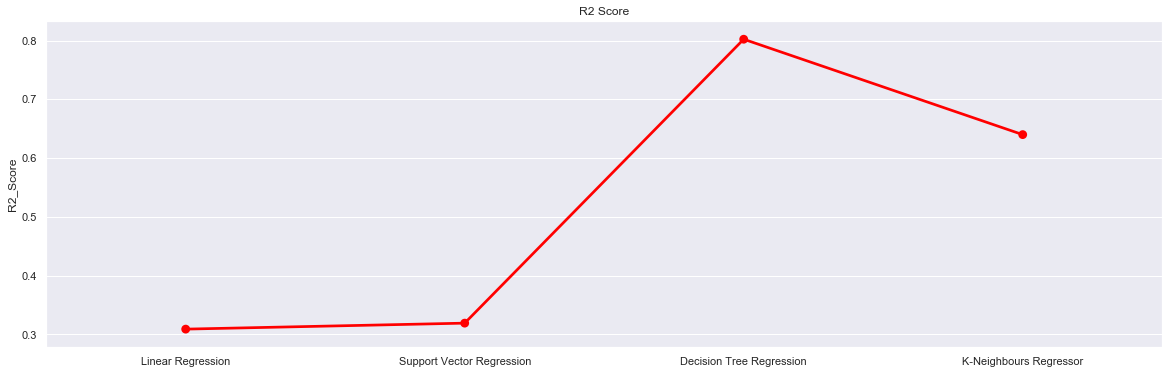

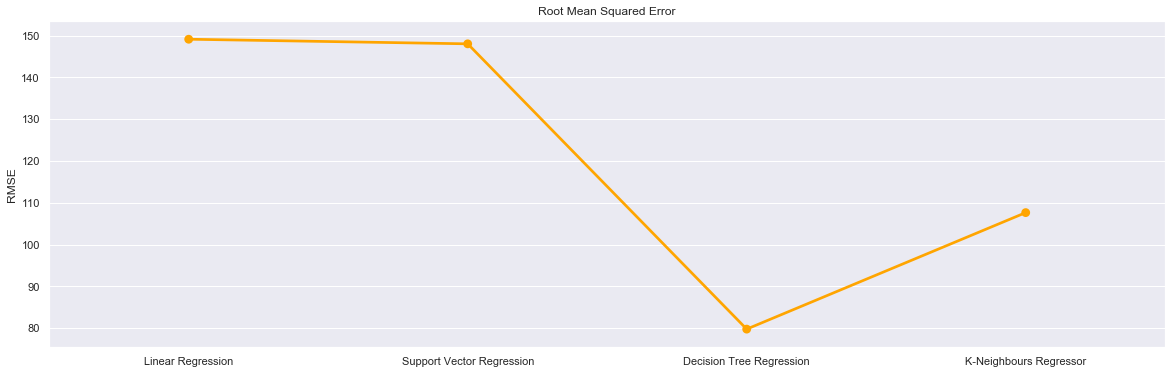

In [76]:
analysis_df = pd.DataFrame([lr_r2,svr_r2,dtr_r2,knr_r2],
                           index =['Linear Regression' , 'Support Vector Regression' , 'Decision Tree Regression' ,'K-Neighbours Regressor'],
                          columns=['R2_Score'])
analysis_df['RMSE'] = [lr_rmse,svm_rmse,dtr_mse,knr_mse]
print(analysis_df)

plt.figure(figsize = (20,6))
sns.pointplot(x = analysis_df.index, y = analysis_df['R2_Score'],color= 'red')
plt.title("R2 Score")
plt.show()
plt.figure(figsize = (20,6))
sns.pointplot(x = analysis_df.index, y = analysis_df['RMSE'],color= 'orange')
plt.title('Root Mean Squared Error')
plt.show()

### Among the regressor the Decision Tree Regressor has the most accuracy

## 4. Ensemble Model

In [77]:
#Ada boost Regressor

In [78]:
abr = AdaBoostRegressor(best_dtr)
abr = abr.fit(X_train,y_train)
abr_r2 = r2_score(y_test,abr.predict(X_test))
abr_rmse = np.sqrt(mean_squared_error(y_test,abr.predict(X_test)))
print(abr_r2)
print(abr_rmse)

0.8273505879161679
74.53885101416554


In [79]:
# Random Forest Regressor

In [80]:
rfr = RandomForestRegressor(n_estimators = 100,max_depth = 30)
kfold = KFold(n_splits=10, random_state=0)
predicted = cross_val_score(rfr, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error').mean()
rfr_rmse = np.sqrt(-1*predicted)
predicted = cross_val_score(rfr, X_train, y_train, cv=kfold, scoring='r2').mean()
rfr_r2 = predicted

In [81]:
print(rfr_r2)
print(rfr_rmse)

0.8464340961972494
70.29854253535754


In [82]:
#Extra Trees Regressor

In [83]:
etr = ExtraTreesRegressor(n_estimators = 100,max_depth = 30)
kfold = KFold(n_splits=10, random_state=0)
predicted = cross_val_score(etr, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error').mean()
etr_rmse = np.sqrt(-1*predicted)
predicted = cross_val_score(etr, X_train, y_train, cv=kfold, scoring='r2').mean()
etr_r2 = predicted

In [84]:
print(etr_r2)
print(etr_rmse)

0.8392302163748914
71.90254282242887


In [85]:
#Gradient Boost Regressor

In [86]:
gbr  =GradientBoostingRegressor()
kfold = KFold(n_splits=10, random_state=0)
predicted = cross_val_score(gbr, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error').mean()
gbr_rmse = np.sqrt(-1*predicted)
predicted = cross_val_score(gbr, X_train, y_train, cv=kfold, scoring='r2').mean()
gbr_r2 = predicted

In [87]:
print(gbr_r2)
print(gbr_rmse)

0.7963050355834767
80.80668995771987


##### Analysis

In [88]:
ensemble_df = pd.DataFrame([abr_r2,rfr_r2,etr_r2,gbr_r2],
                           index =['AdaBoostRegressor' , 'RandomForestRegressor' , 'ExtraTreesRegressor' ,'GradientBoostingRegressor'],
                          columns=['R2_Score'])
ensemble_df['RMSE'] = [abr_rmse , rfr_rmse,etr_rmse,gbr_rmse]
print(ensemble_df)

                           R2_Score       RMSE
AdaBoostRegressor          0.827351  74.538851
RandomForestRegressor      0.846434  70.298543
ExtraTreesRegressor        0.839230  71.902543
GradientBoostingRegressor  0.796305  80.806690


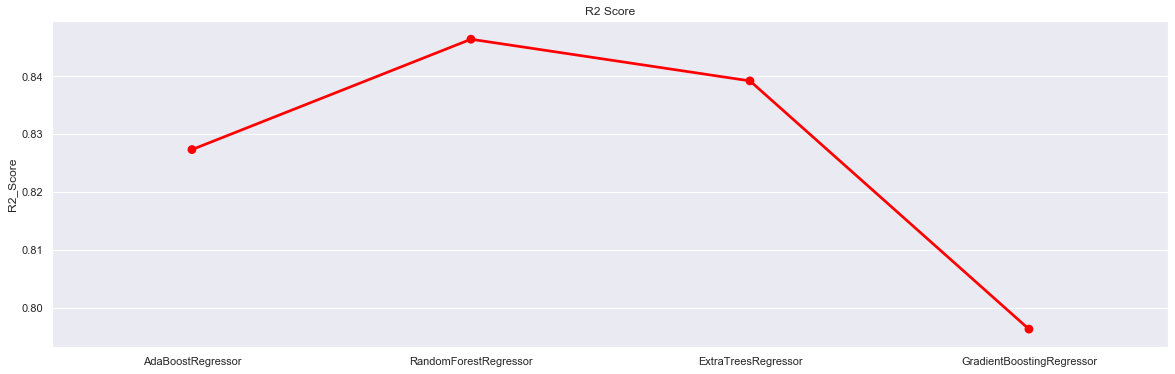

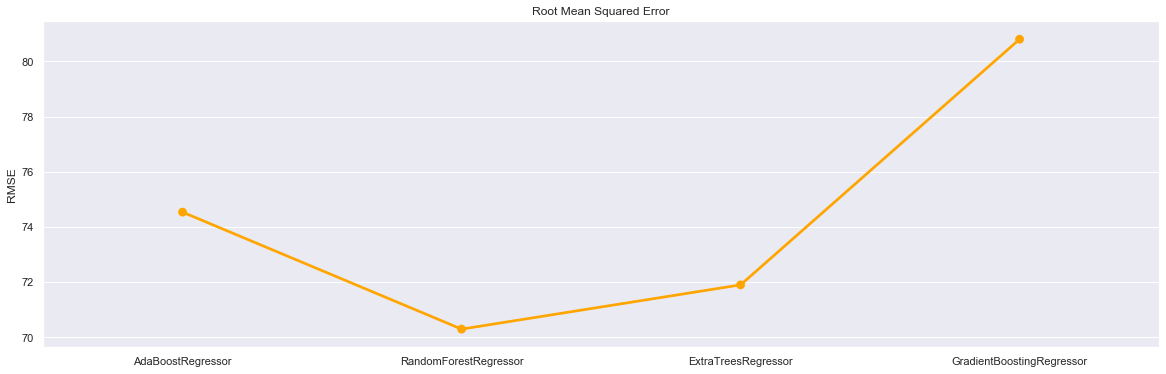

In [89]:
plt.figure(figsize = (20,6))
sns.pointplot(x = ensemble_df.index, y = ensemble_df['R2_Score'],color= 'red')
plt.title("R2 Score")
plt.show()
plt.figure(figsize = (20,6))
sns.pointplot(x = ensemble_df.index, y = ensemble_df['RMSE'],color= 'orange')
plt.title('Root Mean Squared Error')
plt.show()

### From the above ensemble model RANDOM FOREST REGRESSOR gives the best accuracy.